In [31]:
import mxnet as mx
from mxnet import nd, init
from mxnet.gluon import nn
import matplotlib.pyplot as plt

In [5]:
# Creating convolutioanl layer in gluon
layer = nn.Conv2D(
    channels=1,
    kernel_size=(3,3),
    in_channels=1,
    strides=(1,1),
    padding=(0,0),
    activation='relu',
    prefix='conv_'
)
layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

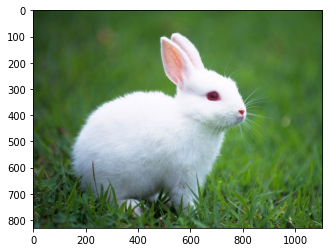

In [6]:
o=plt.imshow(plt.imread('rabbit.jpg'))

In [13]:
layer.initialize(mx.init.Constant([
    [-1,0,1], # Sobel Operation
    [-2,0,2],
    [-1,0,1]]
))

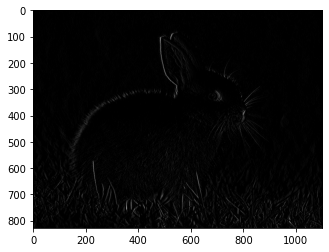

In [14]:
# Loading the image in gray scale since we have a single input channel
image = mx.image.imread('rabbit.jpg', 0).astype('float32')
image_channel_first = image.transpose((2,0,1))
image_batchified = image_channel_first.expand_dims(axis=0)
output = layer(image_batchified)
o=plt.imshow(output.squeeze().asnumpy(), cmap='gray')

In [15]:
layer.collect_params()

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [16]:
layer.collect_params()['conv_weight']

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [17]:
layer.weight

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [18]:
# Accessing the value of the weight directly...
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [19]:
# The value of the bias, it initalized to 0 by default
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

In [21]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

In [22]:
pooled = layer(output)

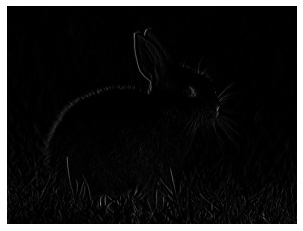

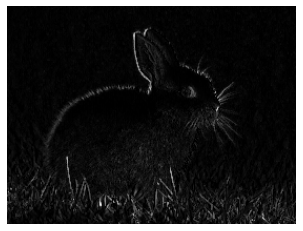

In [23]:
plt.imshow(output.squeeze().asnumpy(), cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(pooled.squeeze().asnumpy(), cmap='gray')
o = plt.axis('off')

In [24]:
# Collecting the parameters of this pooling layer, we get an empty dictionary
# Because this block does not rely on any parameters and it is fully deterministic 
# given the pool size and padding arguments.
layer.collect_params()

pool0_ (

)

In [25]:
# Dense Layer
layer = nn.Dense(units=10, in_units=3, activation='relu')
layer

Dense(3 -> 10, Activation(relu))

In [27]:
layer.initialize(mx.init.One())

In [28]:
inputs = mx.nd.ones((1,3))
inputs, layer(inputs)

(
 [[1. 1. 1.]]
 <NDArray 1x3 @cpu(0)>,
 
 [[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]
 <NDArray 1x10 @cpu(0)>)

In [29]:
layer.weight.data()


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<NDArray 10x3 @cpu(0)>

In [30]:
layer.bias.data()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>

In [32]:
init.Uniform
init.Normal
init.Xavier
init.Zero
init.One
init.Constant

mxnet.initializer.Constant

In [33]:
layer = nn.Conv2D(channels=1, in_channels=1, kernel_size=(3,3))
layer.initialize(init.Xavier())
layer.weight.data()


[[[[ 0.05636501  0.10720772  0.24847925]
   [ 0.39752382  0.11866093  0.41332   ]
   [ 0.05182666  0.4009717  -0.08815584]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [34]:
layer = nn.Conv2D(channels=512, in_channels=512, kernel_size=(3,3))
layer.initialize(init.Xavier())
layer.weight.data()[0]


[[[ 0.00630558  0.00744513 -0.00590012]
  [-0.00318499 -0.01033202  0.01999258]
  [-0.0226214   0.02366119 -0.01160159]]

 [[-0.0059481  -0.00113977  0.01488703]
  [ 0.01593029  0.00147454 -0.00102179]
  [ 0.00347238 -0.0054713   0.02171864]]

 [[ 0.01715045 -0.02189048 -0.00829784]
  [-0.02106922  0.00756137 -0.02448375]
  [-0.00672377  0.01697394  0.0233291 ]]

 ...

 [[-0.01893761  0.01284147 -0.00975751]
  [-0.02142992 -0.00148998 -0.00093406]
  [ 0.00985651 -0.00277236  0.00710726]]

 [[ 0.00880146 -0.01043105 -0.00261599]
  [-0.00773894  0.01042632 -0.01882804]
  [ 0.00926955  0.00075613  0.01006069]]

 [[ 0.00549796  0.00605232 -0.0150173 ]
  [-0.01781082  0.02513626  0.01330902]
  [-0.01826004  0.01434206  0.0111638 ]]]
<NDArray 512x3x3 @cpu(0)>

In [35]:
# Deferred Initialization...
layer = nn.Conv2D(channels=1, kernel_size=(3,3))
layer.weight

Parameter conv2_weight (shape=(1, 0, 3, 3), dtype=<class 'numpy.float32'>)

In [36]:
layer.initialize(init.Xavier())
layer(mx.nd.ones((1,8,224,224)))
layer.weight

Parameter conv2_weight (shape=(1, 8, 3, 3), dtype=<class 'numpy.float32'>)